In [142]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

In [143]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')
    
csv_to_parquet('./open/train.csv', 'train')
csv_to_parquet('./open/sample_submission.csv', 'sample_submission')

train = pd.read_parquet('./train.parquet')
sample_submission=pd.read_parquet('./sample_submission.parquet')

train Done.
sample_submission Done.


In [144]:
def get_view_df(df, target):
    viewd = df[['일시', target]]
    viewd = viewd.reset_index(drop=True)
    viewd = viewd.reset_index()
    print(target)
    sns.set(rc = {'figure.figsize':(30,8)})
    sns.lmplot(x='index',y=target, data=viewd, line_kws={'color':"red"})
    plt.show()

광진구


C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\co

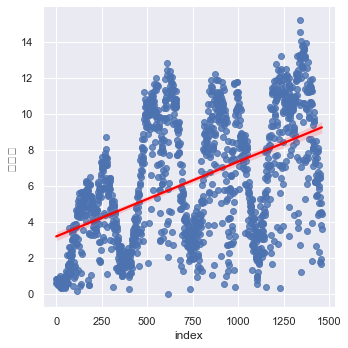

동대문구


C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\codi

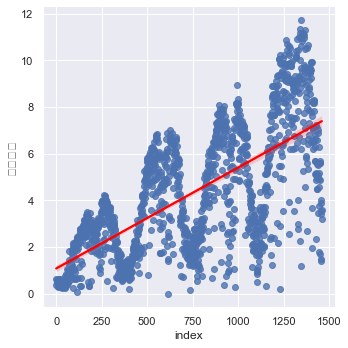

성동구


C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\

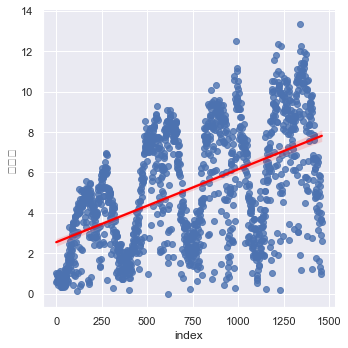

중랑구


C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\coding\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ab516\co

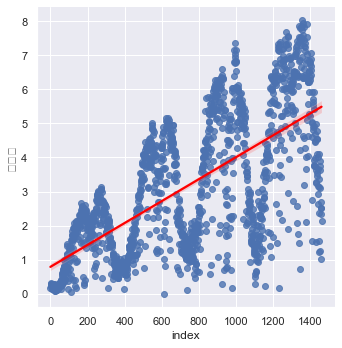

In [145]:
get_view_df(train, '광진구')
get_view_df(train, '동대문구')
get_view_df(train, '성동구')
get_view_df(train, '중랑구')

데이터가 대체로 회귀직선으로부터 오차가 커서 선형회귀분석으로 한계가 있을 것으로 예상됨